In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense , Flatten,MaxPooling2D,ZeroPadding2D,MaxPool2D,GlobalMaxPooling2D,GlobalAveragePooling2D
import cv2
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import os
import re
import PIL 
from PIL import Image
import numpy as np
import pickle
import tensorflow.keras
import tensorflow.keras.layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import math
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib
print(cv2.__version__)

4.8.1


In [2]:
#gpu 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2023-11-22 08:30:47.087827: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 08:30:47.092014: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-22 08:30:47.093823: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-22 08:30:48.748197: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-11-22 08:30:48.749334: I tensorflow/core/common_runtime/gpu/gpu_d

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9963088869100188398,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10565736192
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17435527325583958229
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:07:00.0, compute capability: 7.5",
 name: "/device:GPU:1"
 device_type: "GPU"
 memory_limit: 10565736192
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18316566136631410092
 physical_device_desc: "device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5",
 name: "/device:GPU:2"
 device_type: "GPU"
 memory_limit: 196542464
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1730740944334410873
 physical_device_desc: "device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:0d:00.0, compute capability: 7.5",
 name: "/device:GPU:3"
 device_type: "GPU"
 memory_limit: 10414930048
 loca

 510.07GiB/s
2023-11-22 08:30:48.757345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 6 with properties: 
pciBusID: 0000:0c:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-11-22 08:30:48.758482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 7 with properties: 
pciBusID: 0000:0e:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-11-22 08:30:48.758515: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-22 08:30:48.760379: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-11-22 08:30:48.760420: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcu

In [3]:
#gpu 세팅
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

8 Physical GPUs, 8 Logical GPUs


2023-11-22 08:30:51.934696: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-22 08:30:51.936465: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-11-22 08:30:51.938139: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:08:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2023-11-22 08:30:51.939146: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 2 with properties: 
pciBusID: 0000:0d:00.0 name: NVIDIA GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidt

In [4]:
def load_cifar10_data2(img_rows, img_cols):
 

    # load cifar-10 training and validation sets
    (x_train, y_train), (x_valid, y_valid) = cifar10.load_data()
    x_train = x_train[0:10000, :, :, :]
    y_train = y_train[0:10000]

    x_valid = x_valid[0:5000, :, :, :]
    y_valid = y_valid[0:5000]

    # resize training images
    x_train = np.array([cv2.resize(img, (img_rows, img_cols)) for img in x_train[:, :, :, :]])
    x_valid = np.array([cv2.resize(img, (img_rows, img_cols)) for img in x_valid[:, :, :, :]])


    y_train =to_categorical(y_train, 10)
    y_valid = to_categorical(y_valid, 10)
    
    x_train = x_train.astype('float32')
    x_valid = x_valid.astype('float32')

    # preprocess data (영상이미지라서 255.0으로 나눠서 normalize한다)
    x_train = x_train / 255.0
    x_valid = x_valid / 255.0

    return x_train, y_train, x_valid, y_valid

    

 N N 
2023-11-22 08:30:52.001988: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 4:   N N N N N Y Y Y 
2023-11-22 08:30:52.001994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 5:   N N N N Y N Y Y 
2023-11-22 08:30:52.002003: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 6:   N N N N Y Y N Y 
2023-11-22 08:30:52.002009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 7:   N N N N Y Y Y N 
2023-11-22 08:30:52.014337: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10076 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:07:00.0, compute capability: 7.5)
2023-11-22 08:30:52.015759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:1 with 10076 MB memory) -> physical GPU (device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute

In [5]:
#dataset load
X_train,Y_train, X_test, Y_test = load_cifar10_data2(224, 224)

#(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)
print(Y_train.shape, Y_train.dtype)

Training data:
Number of examples:  10000
Number of channels: 3
Image size: 224 224
Test data:
Number of examples: 5000
Number of channels: 3
Image size: 224 224
(10000, 224, 224, 3) float32
(10000, 10) float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


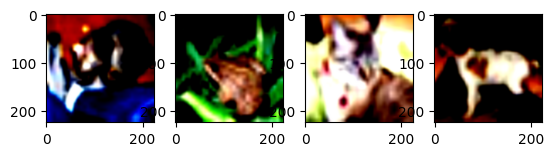

In [28]:
plt.subplot(141)
plt.imshow(X_test[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_test[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_test[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_test[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [7]:
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

tr_mean=[0,0,0]
tr_std=[0,0,0]

te_mean=[0,0,0]
te_std=[0,0,0]

newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
#데이터 정규화

#채널당 평균 및 표준편차구함
for i in range(3):
    tr_mean[i] = np.mean(X_train[:,:,:,i])
    tr_std[i] = np.std(X_train[:,:,:,i])
    te_mean[i] = np.mean(X_train[:,:,:,i])
    te_std[i] = np.std(X_train[:,:,:,i])

#정규화
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - tr_mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / tr_std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - te_mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / te_std[i]
        
    
X_train = newX_train
X_test = newX_test

#Y_train =to_categorical(Y_train, 10)
#Y_test = to_categorical(Y_test, 10)

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

print(Y_train.shape, Y_train.dtype)
print(Y_test.shape, Y_test.dtype)

mean before normalization: 0.47425702
std before normalization: 0.24701633
mean after normalization: -3.795446456020903e-06
std after normalization: 0.9999984728311059
2.1640222226102837
(10000, 10) float32
(5000, 10) float32


In [57]:
def resudual_block(input_tensor,kernel_size,num_filters,naming):
        x=Conv2D(kernel_size=(1,1),filters=num_filters//4,kernel_initializer='he_normal',name='conv_'+naming+'_a')(input_tensor)
        x=BatchNormalization(name='BN_'+naming+'_a')(x)
        x=Activation('relu')(x)
        
        x=Conv2D(kernel_size=kernel_size,padding='same',filters=num_filters//4,kernel_initializer='he_normal',name='conv_'+naming+'_b')(x)
        x=BatchNormalization(name='BN_'+naming+'_b')(x)
        x=Activation('relu')(x)
        
        x=Conv2D(kernel_size=(1,1),filters=num_filters,kernel_initializer='he_normal',name='conv_'+naming+'_c')(x)
        x=BatchNormalization(name='BN_'+naming+'_c')(x)
        x=Add()([input_tensor,x])
        
        x=Activation('relu')(x)
        return x
    
def resudual_block2(input_tensor,kernel_size,num_filters,naming):
   
        x=Conv2D(kernel_size=kernel_size,padding='same',filters=num_filters,kernel_initializer='he_normal',name='conv_'+naming+'_b')(input_tensor)
        x=BatchNormalization(name='BN_'+naming+'_a')(x)
        x=Activation('relu')(x)
        
        x=Conv2D(kernel_size=kernel_size,padding='same',filters=num_filters,kernel_initializer='he_normal',name='conv_'+naming+'_b')(x)
        x=BatchNormalization(name='BN_'+naming+'_b')(x)
       
      
        x=Add()([input_tensor,x])
        
        x=Activation('relu')(x)
        return x

In [62]:
def downsize_block(input_tensor,kernel_size,strides,num_filters,naming):
    x=Conv2D(kernel_size=(1,1),filters=num_filters//4,strides=strides,kernel_initializer='he_normal', name='Conv'+naming+'_a')(input_tensor)
    x=BatchNormalization(name='BN_'+naming+'_a')(x)
    x=Activation('relu')(x)
    
    x=Conv2D(kernel_size=kernel_size,filters=num_filters//4,padding='same',kernel_initializer='he_normal', name='Conv'+naming+'______b')(x)
    x=BatchNormalization(name='BN_'+naming+'_b')(x)
    x=Activation('relu')(x)
    
    
    x=Conv2D(kernel_size=(1,1),filters=num_filters,strides=strides,kernel_initializer='he_normal', name='Conv'+naming+'_____a')(input_tensor)
    x=BatchNormalization(name='BN_'+naming+'_c')(x)
   
    
    shortcut=Conv2D(kernel_size=(1,1),filters=num_filters,strides=strides,kernel_initializer='he_normal',name='SC_'+naming)(input_tensor)
    shortcut=BatchNormalization(name='SC_BN_'+naming)(shortcut)
    
    x=Add()([shortcut,x])
    output_tensor=Activation('relu')(x)
    
    return output_tensor
    
def downsize_block2(input_tensor,kernel_size,strides,num_filters,naming):
  
    x=Conv2D(kernel_size=(1,1),filters=num_filters//4,padding='same',kernel_initializer='he_normal', name='aonv'+naming+'__b')(input_tensor)
    x=BatchNormalization(name='BN_'+naming+'_A')(x)
    x=Activation('relu')(x)
    
    x=Conv2D(kernel_size=kernel_size,filters=num_filters,padding='same',kernel_initializer='he_normal', name='Conv'+naming+'___b')(x)
    x=BatchNormalization(name='BN_'+naming+'_b')(x)
   
       
    
   
    
    shortcut=Conv2D(kernel_size=kernel_size,filters=num_filters,strides=strides,kernel_initializer='he_normal',name='SC_'+naming)(input_tensor)
    shortcut=BatchNormalization(name='SC_BN_'+naming)(shortcut)
    
    x=Add()([shortcut,x])
    output_tensor=Activation('relu')(x)
    
    return output_tensor

In [63]:
def first_convolution(input_tensor):
    x = ZeroPadding2D(padding= (3, 3))(input_tensor)
    x = Conv2D(filters = 64, strides = (2, 2), kernel_size = (7, 7), kernel_initializer= 'he_normal')(x)
    x = BatchNormalization(axis= 3)(x)
    x = Activation('relu')(x)
    
    return x

def first_pooling(input_tensor):
    x = ZeroPadding2D(padding= (1, 1))(input_tensor)
    x = MaxPool2D(pool_size= (3, 3), strides = (2, 2))(x)

    return x

In [67]:
input_tensor = tf.keras.Input(shape= (224, 224, 3))
#layer1
x = first_convolution(input_tensor)

#layer2
x=first_pooling(x)
x=downsize_block(x,(3,3),(1,1),32,'456')
#x=resudual_block(x,(3,3),64,'s2r1')
#x=resudual_block(x,(3,3),256,'s2r2')

#/ayer 3  block =4
x=downsize_block(x,(3,3),(2,2),64,'345')
#x=resudual_block(x,(3,3),128,'s3r1')
#x=resudual_block(x,(3,3),512,'s3r2')
#x=resudual_block(x,(3,3),512,'s3r3')



#layer 4 block=6
x=downsize_block(x,(3,3),(2,2),128,'234')
#x=resudual_block(x,(3,3),254,'s4r1')
#x=resudual_block(x,(3,3),1024,'s4r2')
#x=resudual_block(x,(3,3),1024,'s4r3')
#x=resudual_block(x,(3,3),1024,'s4r4')
#x=resudual_block(x,(3,3),1024,'s4r5')

#layer5 block=3
x = downsize_block(x, (3, 3), (2, 2), 256, '123')
x = resudual_block(x, (3, 3), 256, '3213')
#x = resudual_block(x, (3, 3), 2048, 's5d2')

#Global Average Pooling 으로 사이즈를 1x1x2048 로 만듦.
x = GlobalAveragePooling2D()(x)
x = Dense(10,kernel_initializer=initializers.RandomNormal(stddev=0.01),name='fc1000',  kernel_regularizer=regularizers.L1(0.01),bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(0.01))(x)
x = Activation('softmax', dtype='float32')(x)
model = Model(inputs = input_tensor, outputs = x)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_36 (ZeroPadding2 (None, 230, 230, 3)  0           input_19[0][0]                   
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d_36[0][0]          
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 112, 112, 64) 256         conv2d_18[0][0]                  
____________________________________________________________________________________________

In [68]:

epoch = 80
initial_lrate = 0.01      

print(Y_train.shape, Y_train.dtype)
print(Y_test.shape, Y_test.dtype)
def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epoch_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1 + epoch) / epoch_drop))
    return lrate


(10000, 10) float32
(5000, 10) float32


In [69]:
sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)
lr_sc = LearningRateScheduler(decay, verbose=1)



model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, Y_train,epochs=epoch, batch_size=64,validation_data=(X_test, Y_test))

Epoch 1/80
157/157 [==============================] - 12s 70ms/step - loss: 2.2363 - accuracy: 0.2317 - val_loss: 2.1208 - val_accuracy: 0.2796
Epoch 2/80
157/157 [==============================] - 8s 48ms/step - loss: 2.0160 - accuracy: 0.3219 - val_loss: 1.9926 - val_accuracy: 0.3384
Epoch 3/80
157/157 [==============================] - 8s 48ms/step - loss: 1.9489 - accuracy: 0.3570 - val_loss: 2.0939 - val_accuracy: 0.3280
Epoch 4/80
157/157 [==============================] - 8s 48ms/step - loss: 1.8770 - accuracy: 0.4113 - val_loss: 1.8893 - val_accuracy: 0.4098
Epoch 5/80
157/157 [==============================] - 8s 48ms/step - loss: 1.8020 - accuracy: 0.4619 - val_loss: 1.9295 - val_accuracy: 0.4116
Epoch 6/80
157/157 [==============================] - 7s 48ms/step - loss: 1.7717 - accuracy: 0.4724 - val_loss: 1.8253 - val_accuracy: 0.4412
Epoch 7/80
157/157 [==============================] - 8s 48ms/step - loss: 1.7194 - accuracy: 0.4944 - val_loss: 1.7462 - val_accuracy: 0.482

Epoch 58/80
157/157 [==============================] - 8s 48ms/step - loss: 0.8223 - accuracy: 0.9461 - val_loss: 1.8895 - val_accuracy: 0.5100
Epoch 59/80
157/157 [==============================] - 8s 49ms/step - loss: 0.8134 - accuracy: 0.9503 - val_loss: 1.7754 - val_accuracy: 0.5400
Epoch 60/80
157/157 [==============================] - 8s 49ms/step - loss: 0.7979 - accuracy: 0.9502 - val_loss: 1.7941 - val_accuracy: 0.5400
Epoch 61/80
157/157 [==============================] - 8s 48ms/step - loss: 0.7834 - accuracy: 0.9601 - val_loss: 1.8665 - val_accuracy: 0.5142
Epoch 62/80
157/157 [==============================] - 8s 49ms/step - loss: 0.7860 - accuracy: 0.9546 - val_loss: 1.8665 - val_accuracy: 0.5212
Epoch 63/80
157/157 [==============================] - 8s 49ms/step - loss: 0.7989 - accuracy: 0.9505 - val_loss: 1.8345 - val_accuracy: 0.5314
Epoch 64/80
157/157 [==============================] - 8s 49ms/step - loss: 0.7792 - accuracy: 0.9591 - val_loss: 1.8513 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


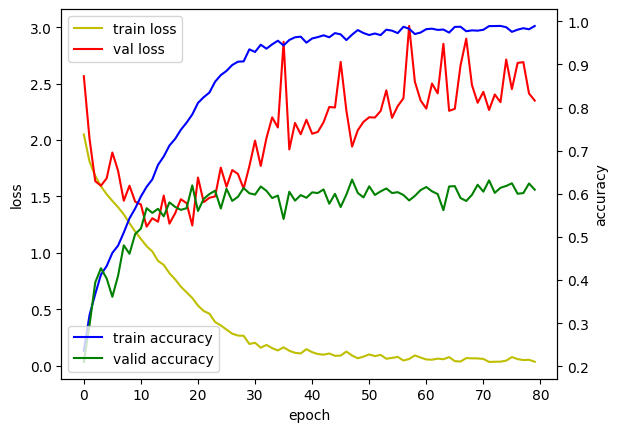

In [16]:
print(history.history.keys())
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'r', label = 'val loss')
    
acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label = 'valid accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()